In [23]:
%matplotlib inline
import numpy as np
import pylab as plt
from glob import glob
import os
import math
import sys
sys.path.insert(0,r"C:\Program Files\xraylib 64-bit\Python")
import xraylib


In [24]:
def absorb(E, material, s, r): 
    """
    This function calculate the intensity of the radiation given absorption.
    
    :param l: wavelength
    :param intensity: intensity without absorption
    :param material: absorbing layer
    :param s: the thickness of the absorbing layer
    :returns: intensity with absorption
    """
    A = np.exp(-xraylib.CS_Total_CP(material, E)*r*s)
    return A


In [25]:
def func(E, Ek):
    

    z=42.0 # порядковый номер элемента анода(молибден)
    res = z*Ek*Ek/12.39/12.39*E*E*(Ek/12.39-1/12.39*E)
    return res

In [44]:
Ekr = 1000 #np.arange(10, 100, 10)
E = 2/3*Ekr
t0 = 1/5*0.009
t = 0
m = 360 
n = 240
Mas = a = [[func(E,Ekr)] * n for i in range(m)]

for i in range(0, m, 1):
    for j in range(0, n, 1):
        if i>130 and i<=180:
            t=t+t0
            Mas[i][j] = func(E,Ekr)*absorb(E, 'H2O', t, 1)
        elif i>180 and i<=230:
            t=t-t0
            Mas[i][j] = func(E,Ekr)*absorb(E, 'H2O', t, 1)
            

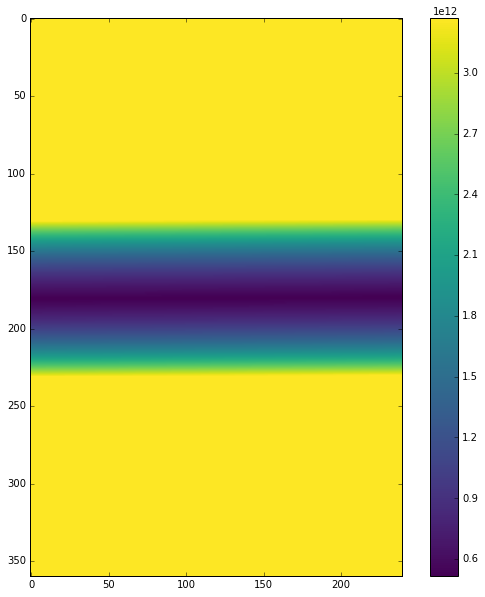

In [45]:

plt.figure(figsize=(10,10))
plt.imshow(Mas, cmap=plt.cm.viridis)
plt.colorbar()
plt.show()